In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
Y = iris.target
#只处理2分类，并且为了可视化，只提取两个特征
X = X[Y<2, :2]
Y = Y[Y<2]

## 绘制图像

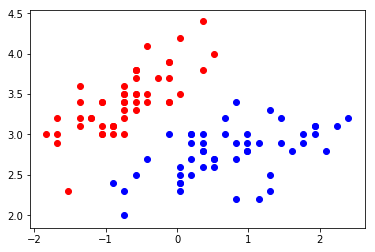

In [16]:
plt.scatter(X_standard[Y==0,0], X[Y==0,1], color='r')
plt.scatter(X_standard[Y==1,0], X[Y==1,1], color='b')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [39]:
from sklearn.svm import LinearSVC
# C越大容错越小，一般取较小值，防止极端数据
#先尝试设置极大的C值，此时容错率极小，对于极端数据难以处理
svc = LinearSVC(C=1e9)
svc.fit(X_standard, Y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## 绘制决策边界

In [21]:
def plot_decision_boundary(model, axis):
    import numpy as np
    X0, X1= np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[X0.ravel(), X1.ravel()]
    Y_predict = model.predict(X_new)
    zz = Y_predict.reshape(X0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(X0, X1, zz, linewidth=5 , cmap=custom_cmap)

D:\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


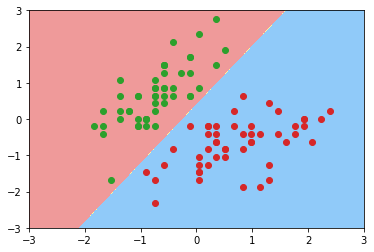

In [23]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[Y==0,0], X_standard[Y==0,1])
plt.scatter(X_standard[Y==1,0], X_standard[Y==1,1])
plt.show()

In [24]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, Y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

D:\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


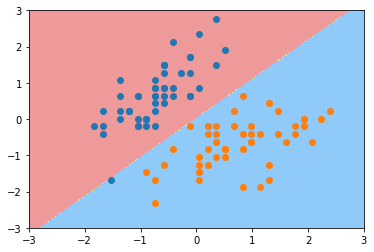

In [25]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[Y==0,0], X_standard[Y==0,1])
plt.scatter(X_standard[Y==1,0], X_standard[Y==1,1])
plt.show()

In [31]:
svc2.coef_

array([[ 0.44053195, -0.40861688]])

In [30]:
svc2.intercept_

array([ 0.00580439])

## 设置会绘制出svm的决策边界上下两个直线的函数

In [36]:
def plot_svc_decision_boundary(model, axis):
    import numpy as np
    X0, X1= np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[X0.ravel(), X1.ravel()]
    Y_predict = model.predict(X_new)
    zz = Y_predict.reshape(X0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(X0, X1, zz, linewidth=5 , cmap=custom_cmap)
    w = model.coef_[0]
    b = model.intercept_[0]
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - w[1]
    #对于超出边界的变量进行处理
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')
    

D:\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


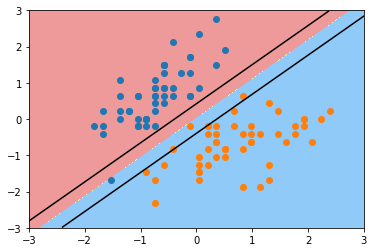

In [41]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[Y==0,0], X_standard[Y==0,1])
plt.scatter(X_standard[Y==1,0], X_standard[Y==1,1])
plt.show()